## Air Pollution Case Study

For the case study of the Air Pollution data following steps are done:
 * Imported different libraries acoording to the need.
 * Loading the data and data exploration.
 * Exploratory Data Analysis is done for getting the deeper details of the data.
 * Splitting of data for the proper study as the data consist of month wise and year wise details.
 * Visualization of data for more understanding.
 * Scaling the data for proper study of data (While model fitting, the algorithm might give more weight to features which have higher range of values. This introduces bias in model building, which needs to be corrected.)
 * Model Building for clustering the data
 * Exploring the characteristics of each cluster


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [2]:
data = pd.read_csv("Air_Pollution.csv",encoding='ISO-8859-1')

In [3]:
data.head()

,Rank,City,2022,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,2021,2020,2019,2018,2017
0,1,"PakistanLahore, Pakistan",97.4,133,102.5,85.6,69.3,60.9,52.1,47.8,46.2,64.2,123.2,190.5,192.9,86.5,79.2,89.5,114.9,133.2
1,2,"ChinaHotan, China",94.3,61.7,91.6,132.7,106.2,120.5,69.5,172.5,75,65.1,75,50.3,120,101.5,110.2,110.1,116,91.9
2,3,"IndiaBhiwadi, India",92.7,110.6,98,116.2,149.5,123.8,102.8,38.8,36.5,59.9,85.4,111.4,86.9,106.2,95.5,83.4,125.4,-
3,4,"IndiaDelhi (NCT), India",92.6,141,100.9,91,98,73.2,56.2,34.3,31.1,38.3,99.7,176.8,171.9,96.4,84.1,98.6,113.5,108.2
4,5,"PakistanPeshawar, Pakistan",91.8,110.2,103.5,78.3,68.5,53.5,56.3,51.8,57.8,79,100,132,212.1,89.6,-,63.9,-,-


In [4]:
data['City'].nunique()

6985

### Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    7323 non-null   int64  
 1   City    7323 non-null   object 
 2   2022    7323 non-null   float64
 3   JAN     7323 non-null   object 
 4   FEB     7323 non-null   object 
 5   MAR     7323 non-null   object 
 6   APR     7323 non-null   object 
 7   MAY     7323 non-null   object 
 8   JUN     7323 non-null   object 
 9   JUL     7323 non-null   object 
 10  AUG     7323 non-null   object 
 11  SEP     7323 non-null   object 
 12  OCT     7323 non-null   object 
 13  NOV     7323 non-null   object 
 14  DEC     7323 non-null   object 
 15  2021    7323 non-null   object 
 16  2020    7323 non-null   object 
 17  2019    7323 non-null   object 
 18  2018    7323 non-null   object 
 19  2017    7323 non-null   object 
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


In [6]:
data.shape

(7323, 20)

In [7]:
data.size

146460

In [8]:
data.columns

Index(['Rank', 'City', '2022', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', '2021', '2020', '2019', '2018',
       '2017'],
      dtype='object')

The shape of given data is (7323,20) with size 146460. That is the data contains 20 columns and 7323 rows, and 146460 elements. The columns of the data are 'Rank', 'City', '2022', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC', '2021', '2020', '2019', '2018','2017'. The data consist of year wise and month wise details. Data for the years from 2017 to 2022 is given, also montly split data of the year 2022 is given. Some columns are of Dtype 'object' since there is a character '-', instead of NaN. We need to change this '-' to NaN for further analysis.

In [9]:
for j in data.columns:
    data[j].replace("-",np.nan,inplace=True)

In [10]:
data.isnull().sum()

Rank       0
City       0
2022       0
JAN      224
FEB      170
MAR       83
APR       45
MAY       21
JUN       26
JUL       26
AUG       33
SEP       81
OCT       98
NOV      158
DEC      267
2021     861
2020    3370
2019    3576
2018    4977
2017    5154
dtype: int64

In [11]:
for j in data.columns[2:]:
    data[j]=data[j].astype("float64")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    7323 non-null   int64  
 1   City    7323 non-null   object 
 2   2022    7323 non-null   float64
 3   JAN     7099 non-null   float64
 4   FEB     7153 non-null   float64
 5   MAR     7240 non-null   float64
 6   APR     7278 non-null   float64
 7   MAY     7302 non-null   float64
 8   JUN     7297 non-null   float64
 9   JUL     7297 non-null   float64
 10  AUG     7290 non-null   float64
 11  SEP     7242 non-null   float64
 12  OCT     7225 non-null   float64
 13  NOV     7165 non-null   float64
 14  DEC     7056 non-null   float64
 15  2021    6462 non-null   float64
 16  2020    3953 non-null   float64
 17  2019    3747 non-null   float64
 18  2018    2346 non-null   float64
 19  2017    2169 non-null   float64
dtypes: float64(18), int64(1), object(1)
memory usage: 1.1+ MB


The character '-' is changed to Nan and the Dtype of the object columns other than 'City' is changed to float64.

In [13]:
data.describe()

,Rank,2022,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,2021,2020,2019,2018,2017
count,7323.000000,7323.000000,7099.000000,7153.000000,7240.000000,7278.000000,7302.000000,7297.000000,7297.000000,7290.000000,7242.000000,7225.000000,7165.000000,7056.000000,6462.000000,3953.000000,3747.000000,2346.000000,2169.000000
mean,3662.000000,12.587765,16.977363,13.455627,14.359848,11.604740,10.698521,9.823256,9.676442,9.913676,11.229343,12.741439,14.435213,16.107001,13.988610,14.233747,14.540085,17.339344,17.913278
std,2114.112343,10.593831,19.413728,14.451468,14.087268,12.185702,10.816504,8.845777,7.324982,6.934833,9.141621,11.361186,15.700574,18.766280,11.022968,11.311261,12.434398,15.798781,17.083223
min,1.000000,0.200000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.300000,0.200000,0.200000,0.100000,1.500000,2.200000,1.900000,2.200000,1.900000
25%,1831.500000,7.000000,6.900000,5.900000,5.200000,4.300000,4.300000,4.800000,5.400000,6.100000,6.100000,6.400000,6.500000,6.500000,8.000000,8.100000,7.600000,8.625000,8.700000
50%,3662.000000,9.300000,10.800000,8.800000,9.700000,8.200000,8.500000,8.300000,8.100000,8.500000,8.400000,9.200000,9.800000,10.400000,10.500000,10.200000,10.500000,11.800000,11.700000
75%,5492.500000,13.800000,18.000000,14.300000,19.000000,12.700000,12.400000,11.700000,11.600000,11.200000,12.600000,15.300000,16.100000,17.600000,15.700000,16.000000,15.200000,18.900000,18.400000
max,7323.000000,97.400000,172.000000,200.200000,245.600000,149.500000,128.300000,130.900000,172.500000,103.300000,108.400000,186.800000,190.500000,248.000000,175.900000,110.200000,110.200000,135.800000,145.600000


Since there is month wise and year wise data, we need to split the data for proper analysis.

In [14]:
data_month = data.iloc[:,[2,15,16,17,18,19]]

In [15]:
data_month

,2022,2021,2020,2019,2018,2017
0,97.4,86.5,79.2,89.5,114.9,133.2
1,94.3,101.5,110.2,110.1,116.0,91.9
2,92.7,106.2,95.5,83.4,125.4,NaN
3,92.6,96.4,84.1,98.6,113.5,108.2
4,91.8,89.6,NaN,63.9,NaN,NaN
...,...,...,...,...,...,...
7318,0.8,7.5,NaN,NaN,NaN,NaN
7319,0.8,7.7,NaN,NaN,NaN,NaN
7320,0.6,2.9,NaN,7.1,NaN,NaN
7321,0.5,9.8,13.0,NaN,NaN,NaN


In [16]:
data_year = data.iloc[:,3:15]

In [17]:
data_year

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,133.0,102.5,85.6,69.3,60.9,52.1,47.8,46.2,64.2,123.2,190.5,192.9
1,61.7,91.6,132.7,106.2,120.5,69.5,172.5,75.0,65.1,75.0,50.3,120.0
2,110.6,98.0,116.2,149.5,123.8,102.8,38.8,36.5,59.9,85.4,111.4,86.9
3,141.0,100.9,91.0,98.0,73.2,56.2,34.3,31.1,38.3,99.7,176.8,171.9
4,110.2,103.5,78.3,68.5,53.5,56.3,51.8,57.8,79.0,100.0,132.0,212.1
...,...,...,...,...,...,...,...,...,...,...,...,...
7318,0.3,0.4,0.4,0.6,0.5,1.0,0.6,0.9,1.5,1.5,1.7,1.4
7319,0.9,0.8,0.5,0.6,0.5,0.8,1.2,1.4,1.1,1.1,0.8,0.6
7320,0.8,0.7,0.5,0.4,0.5,0.6,0.5,0.3,0.5,0.7,0.6,0.8
7321,2.3,0.9,0.3,0.5,0.6,0.5,0.3,0.4,0.3,0.2,0.4,0.3


### Analysis of data_month

In [18]:
data_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2022    7323 non-null   float64
 1   2021    6462 non-null   float64
 2   2020    3953 non-null   float64
 3   2019    3747 non-null   float64
 4   2018    2346 non-null   float64
 5   2017    2169 non-null   float64
dtypes: float64(6)
memory usage: 343.4 KB


In [19]:
data_month.describe()

,2022,2021,2020,2019,2018,2017
count,7323.000000,6462.000000,3953.000000,3747.000000,2346.000000,2169.000000
mean,12.587765,13.988610,14.233747,14.540085,17.339344,17.913278
std,10.593831,11.022968,11.311261,12.434398,15.798781,17.083223
min,0.200000,1.500000,2.200000,1.900000,2.200000,1.900000
25%,7.000000,8.000000,8.100000,7.600000,8.625000,8.700000
50%,9.300000,10.500000,10.200000,10.500000,11.800000,11.700000
75%,13.800000,15.700000,16.000000,15.200000,18.900000,18.400000
max,97.400000,175.900000,110.200000,110.200000,135.800000,145.600000


In [20]:
for j in data_month.columns:
    data_month[j].fillna(data_month[j].mean(),inplace=True)

The null values are replaced with mean

In [21]:
data_month.isnull().sum()

2022    0
2021    0
2020    0
2019    0
2018    0
2017    0
dtype: int64

#### Plotting the correlation between each feature

<AxesSubplot:>

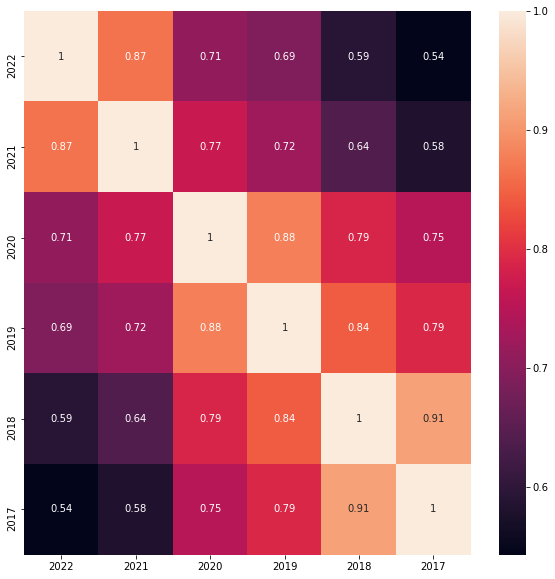

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data_month.corr() ,annot=True)

#### Checking for outliers

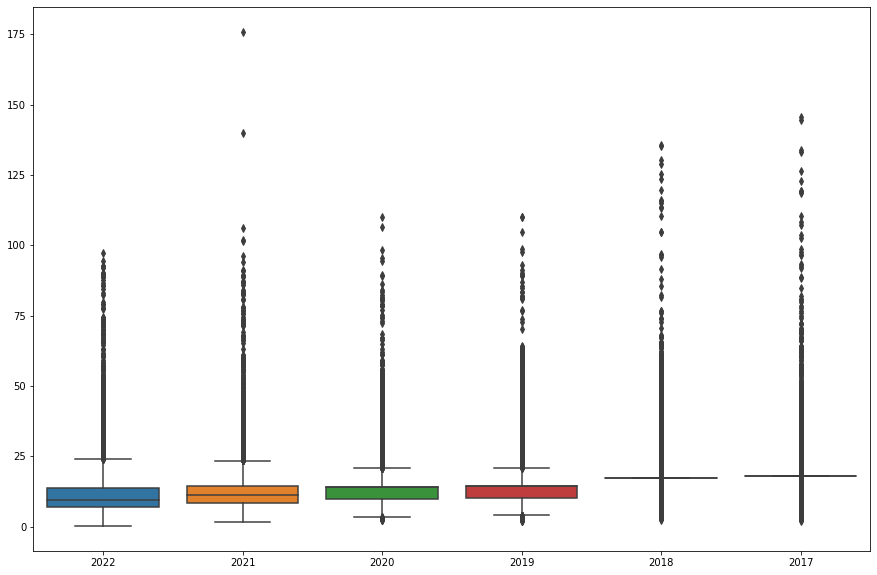

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_month)
plt.show()

In [24]:
data_month[(data_month["2021"]>=125)]

,2022,2021,2020,2019,2018,2017
5,90.3,175.9,14.233747,14.540085,17.339344,17.913278
17,82.2,139.9,14.233747,14.540085,17.339344,17.913278


In [25]:
data_month.drop([5,17],inplace=True)

Outliers are found and hence removed from the data

<Figure size 432x288 with 0 Axes>

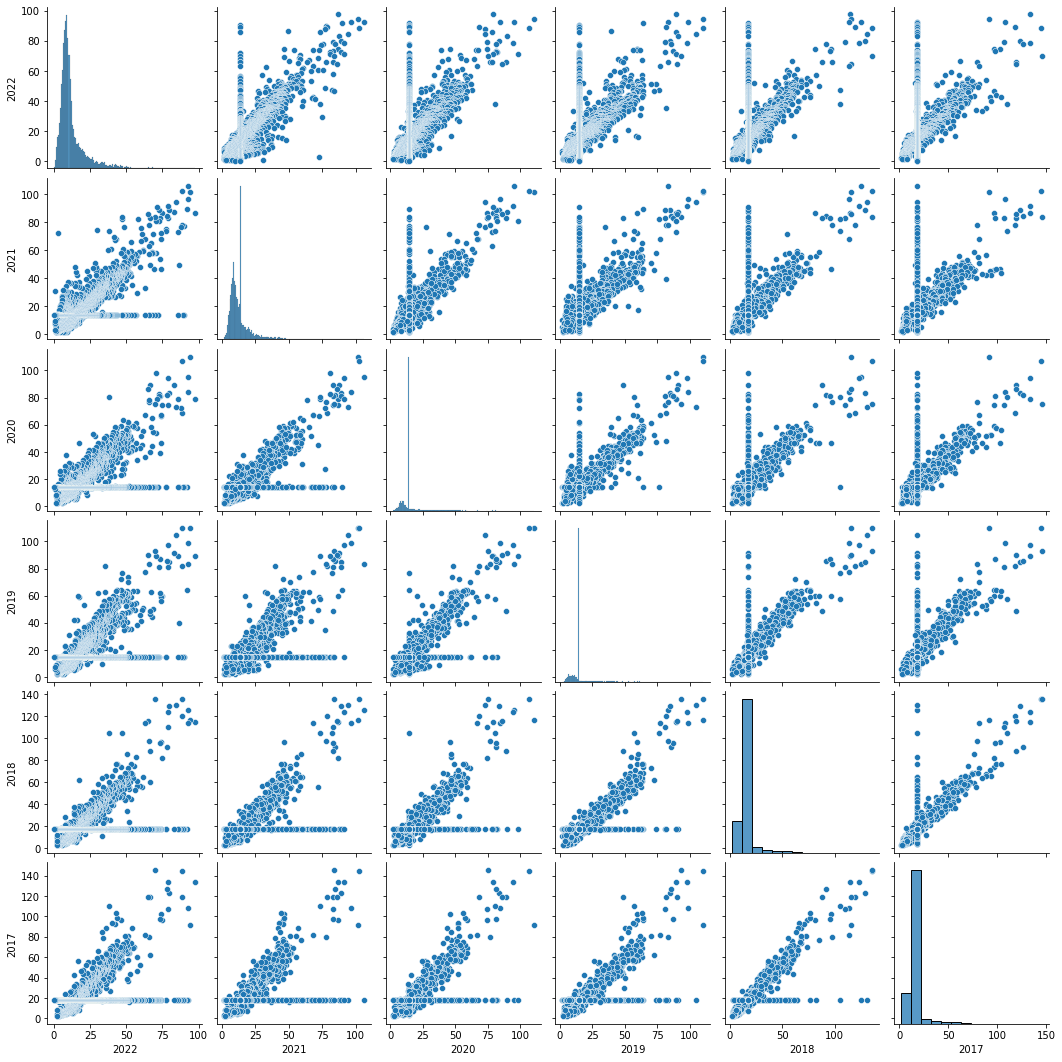

In [26]:
plt.figure()
sns.pairplot(data_month)
plt.show()

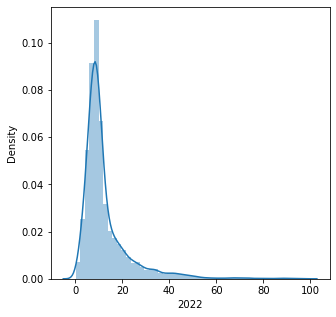

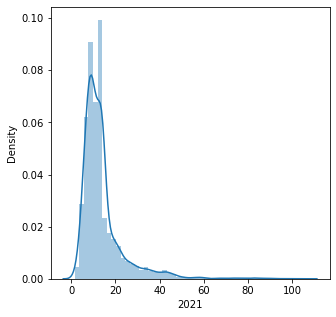

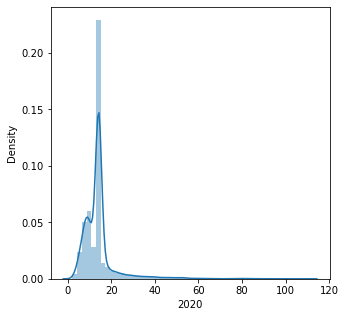

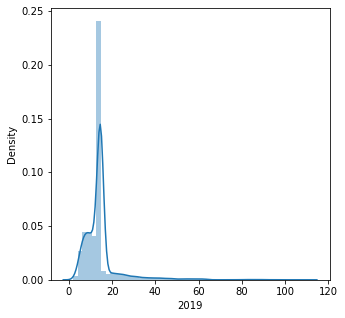

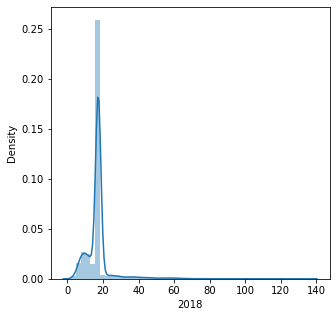

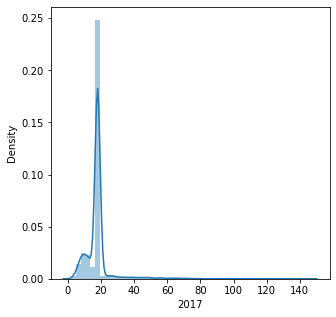

In [27]:
for i in data_month.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(data_month[i])
    plt.show()

###  Scaling Data

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for cols in data_month:
    data_month[cols]=ss.fit_transform(data_month[[cols]])

### Model Building

In [29]:
from sklearn.cluster import KMeans
clusters = list(range(1,6))
wcss=[]
for i in clusters:
    kmodel = KMeans(n_clusters=i)
    kmodel.fit(data_month)
    wcss.append(kmodel.inertia_)

Before we apply clustering algorithm, the optimal number of clusters needs to be determined. This is facilitated through an Elbow Curve Plot.

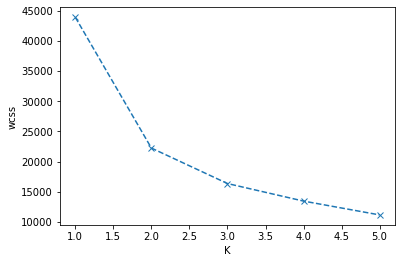

In [30]:
plt.figure()
plt.plot(clusters,wcss,'x--')
plt.xlabel("K")
plt.ylabel("wcss")
plt.show()

At k=3, an elbow shape can be identified. The slope of the curve changes rapidly from k=3. Therefore, k=3 is selected as the optimum value for the number of clusters.

### Model fitting

In [31]:
kmodel = KMeans(n_clusters=3,random_state=0)
kmodel.fit(data_month)

KMeans(n_clusters=3, random_state=0)

In [32]:
kmodel.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

Adding the cluster labels column to the data

In [33]:
data_month["Labels"]=kmodel.labels_

In [34]:
data_month

,2022,2021,2020,2019,2018,2017,Labels
0,8.060746,7.201808,7.817241e+00,8.427633e+00,1.091101e+01,1.240124e+01,2
1,7.766185,8.690796,1.154740e+01,1.074366e+01,1.103403e+01,7.958652e+00,2
2,7.614153,9.157345,9.778583e+00,7.741819e+00,1.208531e+01,-1.146482e-15,2
3,7.604652,8.184540,8.406847e+00,9.450733e+00,1.075444e+01,9.712022e+00,2
4,7.528636,7.509532,-1.709960e-15,5.549463e+00,-3.973291e-16,-1.146482e-15,2
...,...,...,...,...,...,...,...
7318,-1.118158,-0.640195,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,0
7319,-1.118158,-0.620342,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,0
7320,-1.137162,-1.096818,-1.709960e-15,-8.364779e-01,-3.973291e-16,-1.146482e-15,0
7321,-1.146664,-0.411883,-1.484539e-01,-1.997132e-15,-3.973291e-16,-1.146482e-15,0


### Exploring the characteristics of each cluster

In [35]:
data_month[data_month['Labels']==0]

,2022,2021,2020,2019,2018,2017,Labels
671,1.238331,0.003903,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,0
680,1.219327,0.003903,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,0
683,1.209825,0.003903,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,0
690,1.200323,0.003903,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,0
696,1.181319,0.003903,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,0
...,...,...,...,...,...,...,...
7318,-1.118158,-0.640195,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,0
7319,-1.118158,-0.620342,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,0
7320,-1.137162,-1.096818,-1.709960e-15,-8.364779e-01,-3.973291e-16,-1.146482e-15,0
7321,-1.146664,-0.411883,-1.484539e-01,-1.997132e-15,-3.973291e-16,-1.146482e-15,0


In [36]:
data_month[data_month['Labels']==1]

,2022,2021,2020,2019,2018,2017,Labels
6,7.376604,0.003903,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,1
7,7.329094,6.318342,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,1
8,7.272083,0.003903,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,1
12,7.044035,3.548824,-1.709960e-15,2.817449e+00,-3.973291e-16,-1.146482e-15,1
13,6.968019,0.003903,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,1
...,...,...,...,...,...,...,...
3496,-0.291486,2.327854,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,1
3687,-0.310490,1.335196,1.066856e+00,-6.228637e-01,3.870336e-01,2.674933e-01,1
4483,-0.405510,0.580775,8.262007e-01,7.375216e-01,3.087469e-01,3.105208e-01,1
4773,-0.434016,2.039983,-1.709960e-15,-1.997132e-15,-3.973291e-16,-1.146482e-15,1


In [37]:
data_month[data_month['Labels']==2]

,2022,2021,2020,2019,2018,2017,Labels
0,8.060746,7.201808,7.817241e+00,8.427633,1.091101e+01,1.240124e+01,2
1,7.766185,8.690796,1.154740e+01,10.743661,1.103403e+01,7.958652e+00,2
2,7.614153,9.157345,9.778583e+00,7.741819,1.208531e+01,-1.146482e-15,2
3,7.604652,8.184540,8.406847e+00,9.450733,1.075444e+01,9.712022e+00,2
4,7.528636,7.509532,-1.709960e-15,5.549463,-3.973291e-16,-1.146482e-15,2
...,...,...,...,...,...,...,...
590,1.371359,2.099543,3.268853e+00,2.423950,2.176445e+00,2.730816e+00,2
598,1.352355,1.851378,2.619084e+00,2.873664,3.730996e+00,4.010883e+00,2
623,1.314347,1.484095,2.197937e+00,2.918635,2.892210e+00,2.784600e+00,2
624,1.314347,1.801745,1.969314e+00,2.513892,2.612614e+00,3.354714e+00,2


In [38]:
X=data_month.values
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(X)

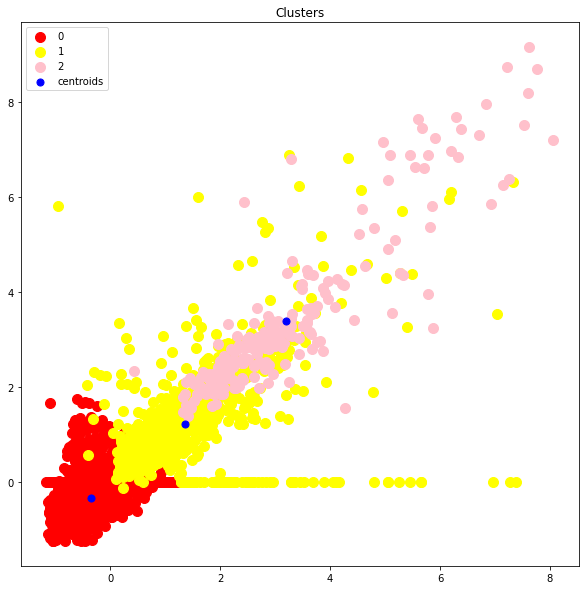

In [39]:
plt.figure(figsize = (10,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = '1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'pink', label = '2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [40]:
data_month['Labels'].value_counts()

0    6068
1    1033
2     220
Name: Labels, dtype: int64

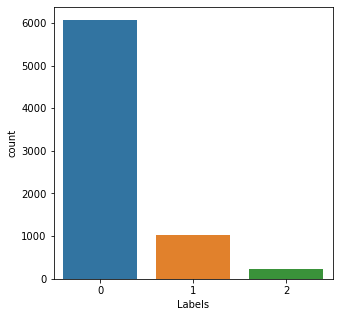

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(x='Labels',data=data_month)
plt.show()

Out of 7321 data:
  * 83% of are in cluster 0
  * 14% of are in cluster 1
  * 3% of are in cluster 2
   

### Analysis of data_year

The same procedure for data_month is done

In [42]:
data_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAN     7099 non-null   float64
 1   FEB     7153 non-null   float64
 2   MAR     7240 non-null   float64
 3   APR     7278 non-null   float64
 4   MAY     7302 non-null   float64
 5   JUN     7297 non-null   float64
 6   JUL     7297 non-null   float64
 7   AUG     7290 non-null   float64
 8   SEP     7242 non-null   float64
 9   OCT     7225 non-null   float64
 10  NOV     7165 non-null   float64
 11  DEC     7056 non-null   float64
dtypes: float64(12)
memory usage: 686.7 KB


In [43]:
data_year.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,7099.000000,7153.000000,7240.000000,7278.000000,7302.000000,7297.000000,7297.000000,7290.000000,7242.000000,7225.000000,7165.000000,7056.000000
mean,16.977363,13.455627,14.359848,11.604740,10.698521,9.823256,9.676442,9.913676,11.229343,12.741439,14.435213,16.107001
std,19.413728,14.451468,14.087268,12.185702,10.816504,8.845777,7.324982,6.934833,9.141621,11.361186,15.700574,18.766280
min,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.300000,0.200000,0.200000,0.100000
25%,6.900000,5.900000,5.200000,4.300000,4.300000,4.800000,5.400000,6.100000,6.100000,6.400000,6.500000,6.500000
50%,10.800000,8.800000,9.700000,8.200000,8.500000,8.300000,8.100000,8.500000,8.400000,9.200000,9.800000,10.400000
75%,18.000000,14.300000,19.000000,12.700000,12.400000,11.700000,11.600000,11.200000,12.600000,15.300000,16.100000,17.600000
max,172.000000,200.200000,245.600000,149.500000,128.300000,130.900000,172.500000,103.300000,108.400000,186.800000,190.500000,248.000000


In [44]:
for j in data_year.columns:
    data_year[j].fillna(data_year[j].mean(),inplace=True)

In [45]:
data_year.isnull().sum()

JAN    0
FEB    0
MAR    0
APR    0
MAY    0
JUN    0
JUL    0
AUG    0
SEP    0
OCT    0
NOV    0
DEC    0
dtype: int64

<AxesSubplot:>

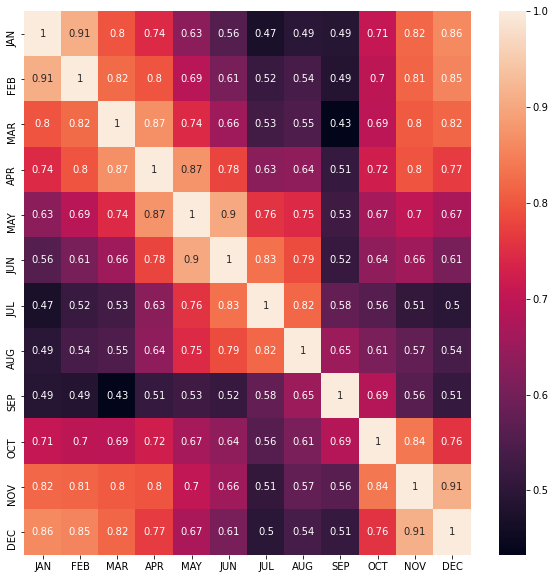

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(data_year.corr() ,annot=True)

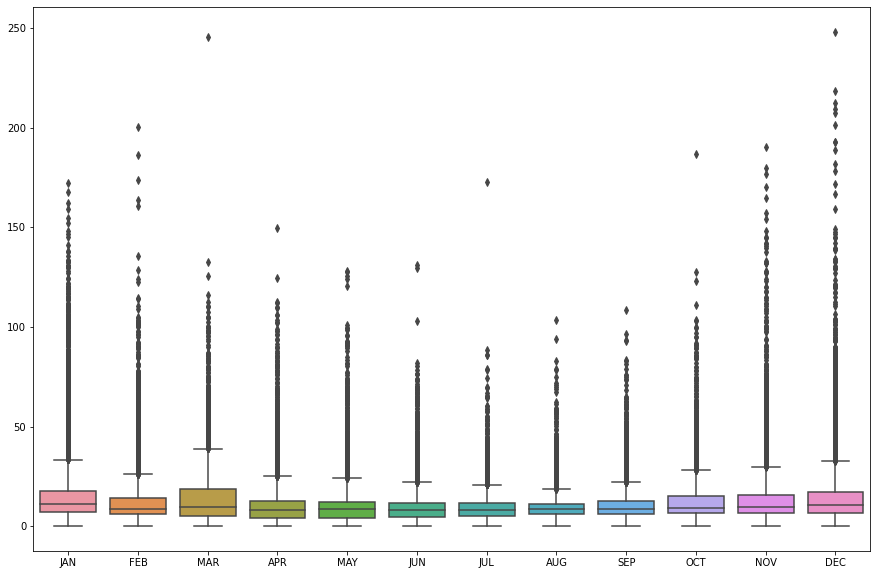

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_year)
plt.show()

<Figure size 432x288 with 0 Axes>

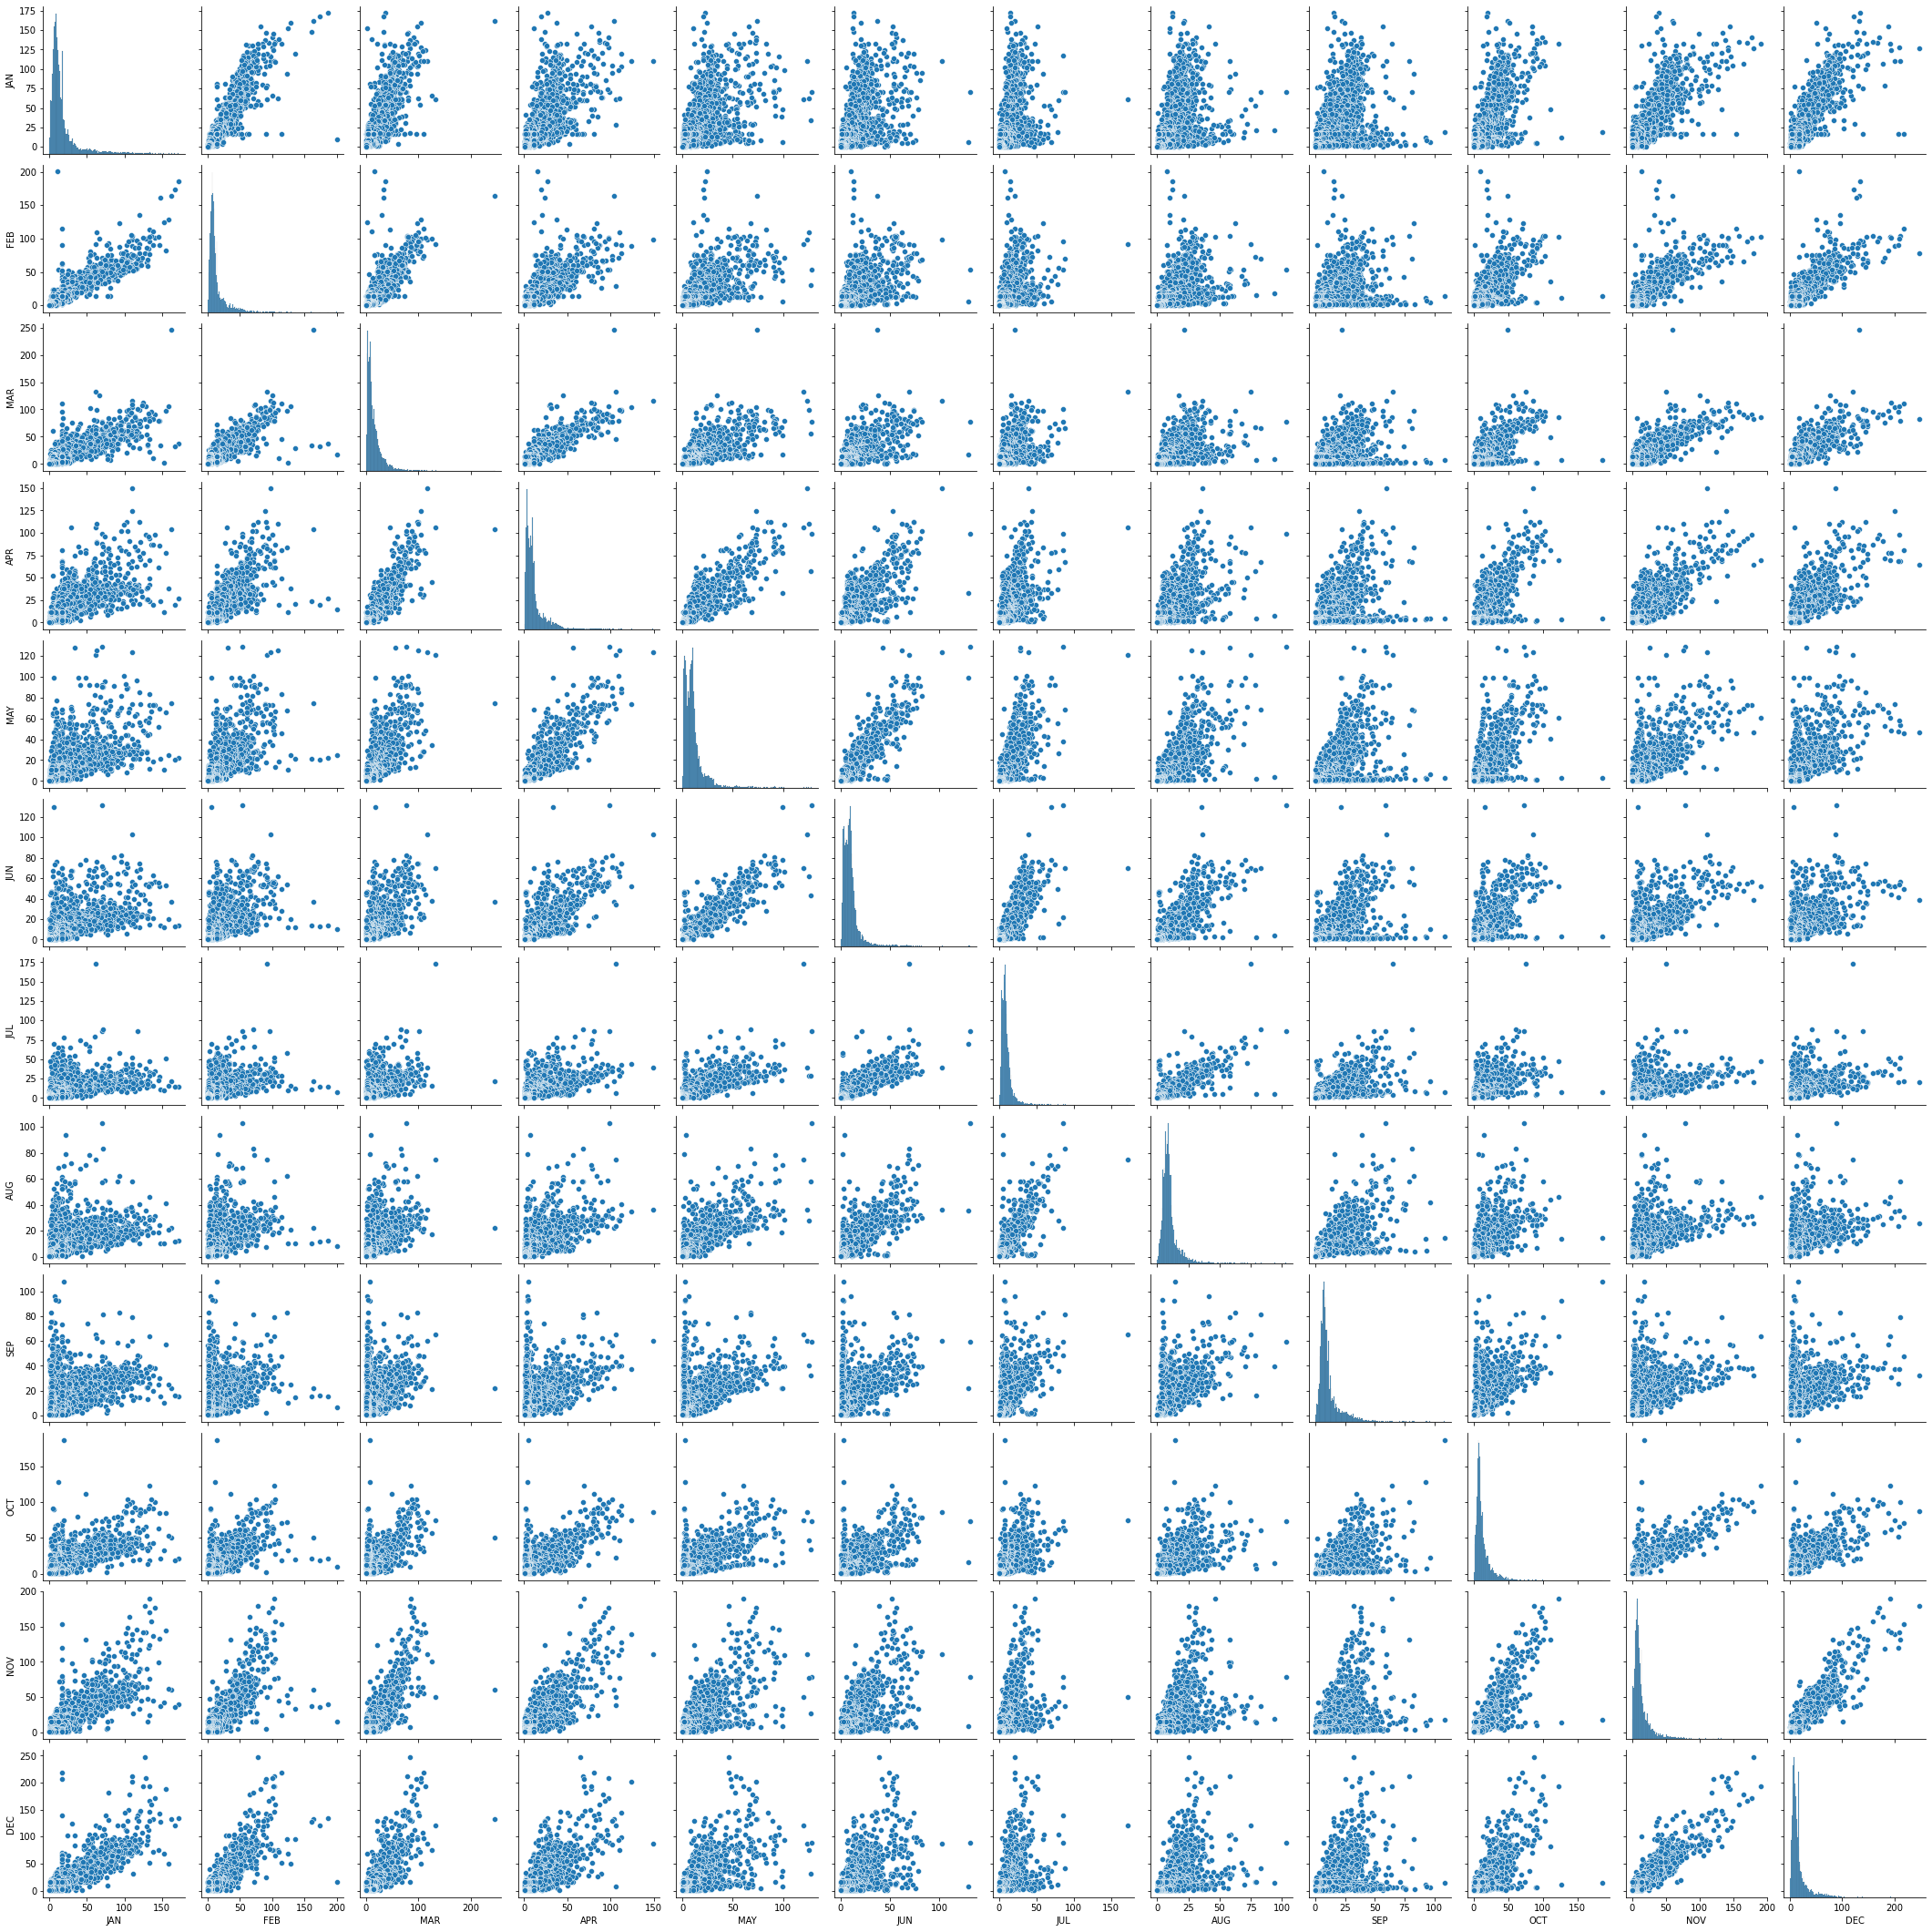

In [48]:
plt.figure()
sns.pairplot(data_year)
plt.show()

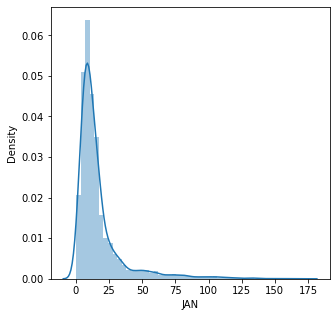

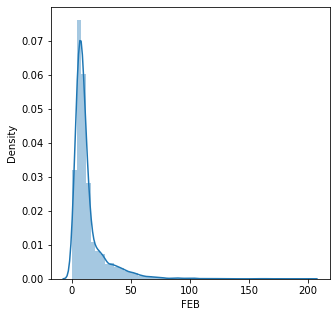

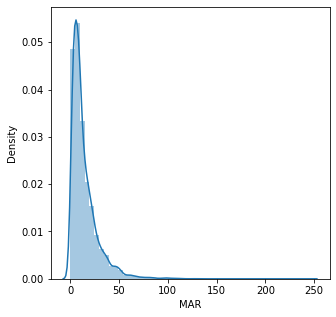

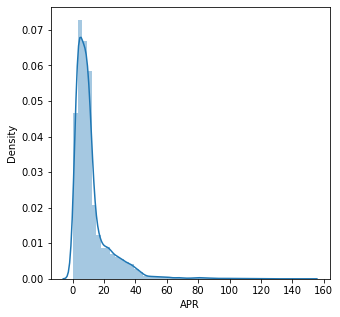

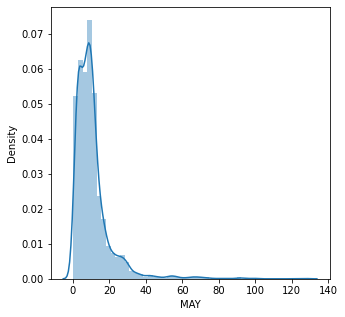

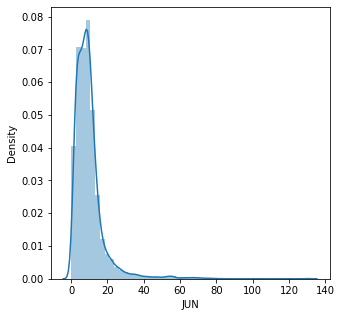

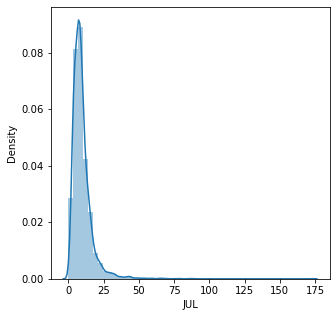

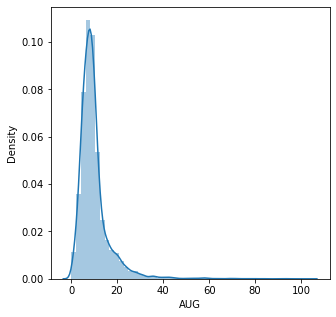

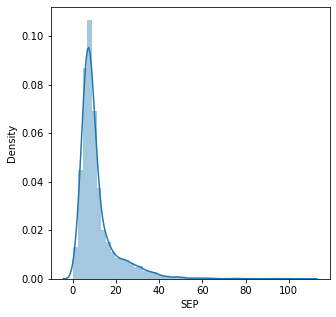

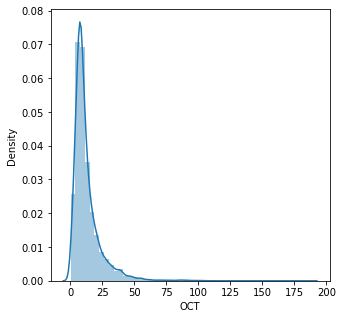

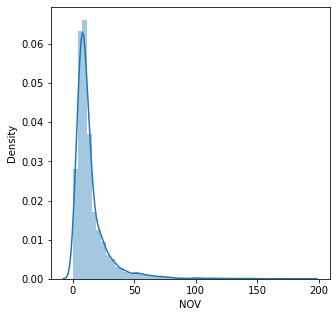

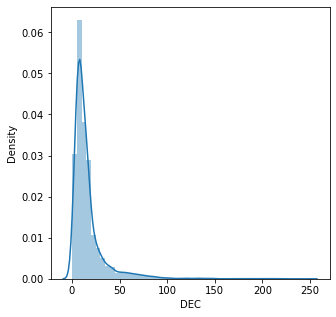

In [49]:
for i in data_year.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(data_year[i])
    plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for cols in data_year:
    data_year[cols]=ss.fit_transform(data_year[[cols]])

In [51]:
from sklearn.cluster import KMeans
clusters = list(range(1,6))
wcss=[]
for i in clusters:
    kmodel = KMeans(n_clusters=i)
    kmodel.fit(data_year)
    wcss.append(kmodel.inertia_)

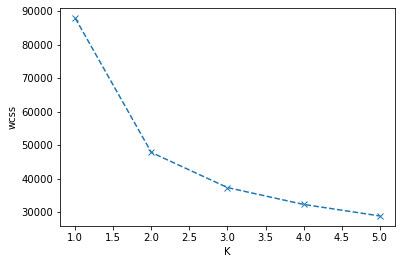

In [52]:
plt.figure()
plt.plot(clusters,wcss,'x--')
plt.xlabel("K")
plt.ylabel("wcss")
plt.show()

In [53]:
kmodel = KMeans(n_clusters=3,random_state=0)
kmodel.fit(data_year)

KMeans(n_clusters=3, random_state=0)

In [54]:
data_year["Labels"]=kmodel.labels_

In [55]:
data_year

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Labels
0,6.070302,6.234840,5.086315,4.749609,4.648180,4.788149,5.214215,5.244662,5.827166,9.788843,11.337667,9.598047,2
1,2.339888,5.471627,8.449102,7.787304,10.166574,6.758826,22.269617,9.407285,5.926173,5.517356,2.309508,5.640325,2
2,4.898335,5.919752,7.271056,11.351862,10.472123,10.530293,3.983272,3.842668,5.354134,6.439005,6.244034,3.843334,2
3,6.488862,6.122809,5.471858,7.112261,5.787043,5.252504,3.367800,3.062176,2.977974,7.706272,10.455458,8.457962,2
4,4.877407,6.304859,4.565119,4.683752,3.963010,5.263830,5.761301,6.921274,7.455276,7.732858,7.570568,10.640410,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7318,-0.872559,-0.914148,-0.996688,-0.905936,-0.944286,-0.999298,-1.241398,-1.302796,-1.070300,-0.996217,-0.820082,-0.798439,0
7319,-0.841167,-0.886140,-0.989548,-0.905936,-0.944286,-1.021949,-1.159335,-1.230529,-1.114303,-1.031665,-0.878038,-0.841871,0
7320,-0.846399,-0.893142,-0.989548,-0.922401,-0.944286,-1.044601,-1.255076,-1.389518,-1.180307,-1.067113,-0.890917,-0.831013,0
7321,-0.767919,-0.879138,-1.003827,-0.914168,-0.935027,-1.055927,-1.282430,-1.375064,-1.202309,-1.111423,-0.903796,-0.858158,0


In [56]:
data_year[data_year['Labels']==0]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Labels
1258,1.638800e+00,1.529531e+00,-4.711101e-02,0.032539,-0.490593,-0.206497,-0.967855,-0.637933,0.150782,-0.056844,1.189037,0.667384,0
1272,2.104643e-01,-4.800274e-01,-5.540279e-01,-0.049784,0.277908,-0.648200,-0.133549,1.371111,0.689819,1.316766,0.506452,0.585949,0
1315,-7.206361e-02,-7.391444e-02,-3.898154e-01,-0.329680,0.092727,0.167252,0.728111,0.894143,-0.146238,0.324222,0.751152,0.770534,0
1327,-7.435116e-16,-2.611971e-15,-3.804783e-15,-0.082713,0.148282,0.246532,0.085285,-0.016430,-0.256245,1.219284,0.738273,1.009409,0
1359,6.604161e-01,8.013289e-01,1.099618e-01,1.053336,-0.138749,-0.591572,-0.803730,-0.840283,-0.597268,0.802770,0.493573,0.553375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7318,-8.725593e-01,-9.141481e-01,-9.966878e-01,-0.905936,-0.944286,-0.999298,-1.241398,-1.302796,-1.070300,-0.996217,-0.820082,-0.798439,0
7319,-8.411673e-01,-8.861403e-01,-9.895481e-01,-0.905936,-0.944286,-1.021949,-1.159335,-1.230529,-1.114303,-1.031665,-0.878038,-0.841871,0
7320,-8.463993e-01,-8.931422e-01,-9.895481e-01,-0.922401,-0.944286,-1.044601,-1.255076,-1.389518,-1.180307,-1.067113,-0.890917,-0.831013,0
7321,-7.679194e-01,-8.791383e-01,-1.003827e+00,-0.914168,-0.935027,-1.055927,-1.282430,-1.375064,-1.202309,-1.111423,-0.903796,-0.858158,0


In [57]:
data_year[data_year['Labels']==1]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Labels
152,3.323503,2.138701,3.387073,-3.363379e-15,1.480264e-15,-3.218965e-15,1.685511,1.732449e+00,0.953837,3.000547,2.476935,2.030056,1
184,7.080078,7.754262,-0.832475,-2.508694e-02,-1.838115e-02,2.352064e-01,0.030576,5.583750e-02,-0.157238,1.724419,1.768591,2.795542,1
238,2.972959,3.854178,2.023395,1.580199e+00,4.538304e-01,1.107287e+00,0.851205,1.616821e+00,1.239856,1.139526,2.064807,3.305865,1
247,3.621727,1.879629,2.387518,1.580199e+00,8.427105e-01,1.481036e+00,1.849637,2.567466e-15,1.437869,1.759867,2.219355,1.346006,1
248,2.836927,1.928642,1.744947,2.395190e+00,2.601930e+00,2.432398e+00,1.822283,2.137149e+00,1.547877,1.006596,1.214795,1.780324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,-0.516783,-0.304979,-0.097089,5.758662e-01,5.464209e-01,4.164180e-01,0.098962,1.443378e+00,0.370797,0.554634,0.596605,-0.060099,1
1922,-0.359824,0.108136,-0.646844,-5.601822e-01,-7.128099e-01,-8.633892e-01,6.691347,8.363292e-01,0.689819,-0.588565,0.197357,-0.456414,1
2047,1.267328,1.963652,-0.089949,5.429373e-01,-1.480079e-01,-1.725198e-01,-0.721667,-3.199548e-01,-0.355252,-0.358153,0.094325,0.955119,1
2127,-0.705135,-0.725096,-0.739659,-5.025566e-01,-5.541735e-02,4.843724e-01,3.613989,4.218460e+00,1.767892,0.519186,0.178038,-0.320690,1


In [58]:
data_year[data_year['Labels']==2]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Labels
0,6.070302,6.234840,5.086315,4.749609,4.648180,4.788149,5.214215,5.244662,5.827166,9.788843,11.337667,9.598047,2
1,2.339888,5.471627,8.449102,7.787304,10.166574,6.758826,22.269617,9.407285,5.926173,5.517356,2.309508,5.640325,2
2,4.898335,5.919752,7.271056,11.351862,10.472123,10.530293,3.983272,3.842668,5.354134,6.439005,6.244034,3.843334,2
3,6.488862,6.122809,5.471858,7.112261,5.787043,5.252504,3.367800,3.062176,2.977974,7.706272,10.455458,8.457962,2
4,4.877407,6.304859,4.565119,4.683752,3.963010,5.263830,5.761301,6.921274,7.455276,7.732858,7.570568,10.640410,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.445904,0.899356,2.223306,2.156455,2.481562,4.244514,4.393586,2.512941,1.877899,1.237008,0.796229,2.697820,2
336,0.571472,0.871348,0.245616,1.571967,3.685239,2.692889,4.803901,5.071220,2.482940,2.025727,1.472375,1.003980,2
367,-0.417375,-0.080916,0.145660,2.181152,6.194441,7.528975,5.898072,6.733378,2.449938,0.625530,-0.440153,-0.613854,2
394,-0.537711,0.038117,0.324152,1.267374,5.425940,7.155226,6.513544,4.811056,1.470872,0.005190,-0.098860,-0.320690,2


In [59]:
X=data_year.values
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(X)

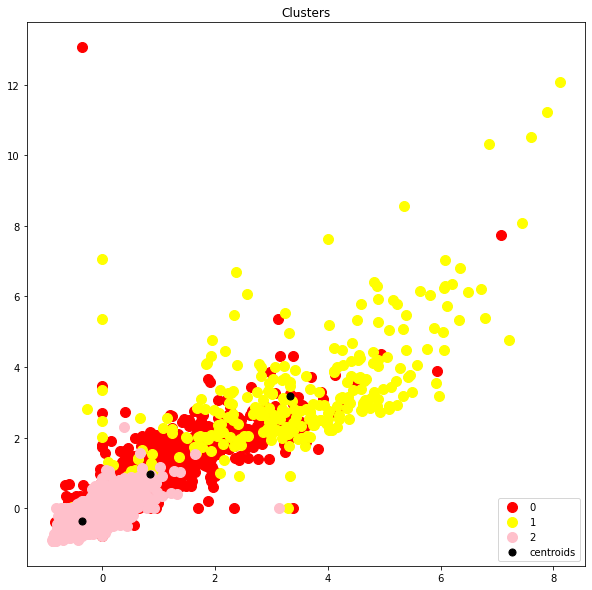

In [60]:
plt.figure(figsize = (10,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = '1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'pink', label = '2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [61]:
data_year['Labels'].value_counts()

0    5763
1    1278
2     282
Name: Labels, dtype: int64

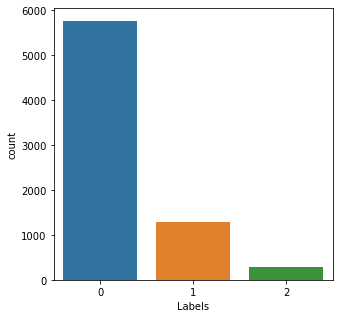

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x='Labels',data=data_year)
plt.show()

Out of 7321 data:
  * 79% of are in cluster 0
  * 17% of are in cluster 1
  * 4% of are in cluster 2
   

### Conclusion

* The data consist of year wise data and month wise data of the year 2022 is given. So we have splitted the data into two sets: data_month and data_year for the proper study.
* The Exploratory Data Analysis carried out has shown important insights such as the correlation of feature, the outliers, null values etc.
* Standardization or normalization of the data has major effect in terms of the model performance. This step is important before feeding the data to the model.
* From the above analysis, we can conclude that the majority of Cities are in the cluster 0.
* This problem statement required Unsupervised Learning, and for my analysis I considered only KMeans Clustering as the algorithm. Other clustering techniques like Hierarchical Clustering etc. can be used, which might give better accuracy.

### Analysis prepared by

Name: Revathy Swarna

Email: revathybs1994@gmail.com